In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Create or retrieve a Spark session
spark = SparkSession.builder \
    .appName("LogisticsBigDataAnalysis") \
    .getOrCreate()



In [2]:
# Example: Read logistics data stored in CSV format from an S3 bucket.
# The CSV might include columns like shipment_id, origin, destination, timestamp, delivery_status, and cost.
data_path = "C:/Users/Hp/Downloads/Amazon/amazon_delivery.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)




In [3]:
df.printSchema()  # Display column data types

from pyspark.sql.functions import col, avg, count, hour, to_timestamp, max as spark_max


root
 |-- Order_ID: string (nullable = true)
 |-- Agent_Age: integer (nullable = true)
 |-- Agent_Rating: double (nullable = true)
 |-- Store_Latitude: double (nullable = true)
 |-- Store_Longitude: double (nullable = true)
 |-- Drop_Latitude: double (nullable = true)
 |-- Drop_Longitude: double (nullable = true)
 |-- Order_Date: date (nullable = true)
 |-- Order_Time: string (nullable = true)
 |-- Pickup_Time: timestamp (nullable = true)
 |-- Weather: string (nullable = true)
 |-- Traffic: string (nullable = true)
 |-- Vehicle: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Delivery_Time: integer (nullable = true)
 |-- Category: string (nullable = true)



In [4]:
df.describe().show()  # Summary statistics

+-------+-------------+------------------+------------------+------------------+------------------+-----------------+------------------+----------+-------+-------+--------+--------------+------------------+--------+
|summary|     Order_ID|         Agent_Age|      Agent_Rating|    Store_Latitude|   Store_Longitude|    Drop_Latitude|    Drop_Longitude|Order_Time|Weather|Traffic| Vehicle|          Area|     Delivery_Time|Category|
+-------+-------------+------------------+------------------+------------------+------------------+-----------------+------------------+----------+-------+-------+--------+--------------+------------------+--------+
|  count|        43739|             43739|             43685|             43739|             43739|            43739|             43739|     43739|  43739|  43739|   43739|         43739|             43739|   43739|
|   mean|         NULL|29.567136880129862| 4.633780473846859|17.210959870596536| 70.66117650789943|17.45903082500754| 70.82184159461912|

In [5]:
# 1️ Show first few rows
df.show(5)

+-------------+---------+------------+--------------+---------------+-------------+--------------+----------+----------+-------------------+----------+-------+-----------+--------------+-------------+-----------+
|     Order_ID|Agent_Age|Agent_Rating|Store_Latitude|Store_Longitude|Drop_Latitude|Drop_Longitude|Order_Date|Order_Time|        Pickup_Time|   Weather|Traffic|    Vehicle|          Area|Delivery_Time|   Category|
+-------------+---------+------------+--------------+---------------+-------------+--------------+----------+----------+-------------------+----------+-------+-----------+--------------+-------------+-----------+
|ialx566343618|       37|         4.9|     22.745049|      75.892471|    22.765049|     75.912471|2022-03-19|  11:30:00|2025-04-12 11:45:00|     Sunny|  High |motorcycle |        Urban |          120|   Clothing|
|akqg208421122|       34|         4.5|     12.913041|      77.683237|    13.043041|     77.813237|2022-03-25|  19:45:00|2025-04-12 19:50:00|    Stor

In [6]:
# 2. Count total orders
df.count()



43739

In [7]:
# 3️ Count unique routes
df.select("Area").distinct().count()



4

In [8]:
# 4. Average delivery time
df.select(avg("Delivery_Time")).show()

+------------------+
|avg(Delivery_Time)|
+------------------+
|124.90564484784746|
+------------------+



In [9]:
# 5. Orders per traffic condition
df.groupBy("Traffic").count().show()






+-------+-----+
|Traffic|count|
+-------+-----+
|Medium |10628|
|   NaN |   91|
|   Low |14999|
|  High | 4296|
|   Jam |13725|
+-------+-----+



In [10]:
# 6. Orders per weather condition
df.groupBy("Weather").count().show()







+----------+-----+
|   Weather|count|
+----------+-----+
|    Cloudy| 7288|
|       Fog| 7440|
|     Sunny| 7078|
|       NaN|   91|
|     Windy| 7223|
|Sandstorms| 7245|
|    Stormy| 7374|
+----------+-----+



In [11]:
# 7. Count vehicle types used
df.groupBy("Vehicle").count().show()





+-----------+-----+
|    Vehicle|count|
+-----------+-----+
|        van| 3558|
|motorcycle |25527|
|   bicycle |   15|
|   scooter |14639|
+-----------+-----+



In [12]:
# 8. Orders by category
df.groupBy("Category").count().show()





+------------+-----+
|    Category|count|
+------------+-----+
|     Kitchen| 2673|
|        Home| 2685|
|      Sports| 2719|
|    Skincare| 2772|
|Pet Supplies| 2690|
|     Apparel| 2726|
|     Grocery| 2691|
| Electronics| 2849|
|    Outdoors| 2747|
|    Clothing| 2667|
|       Books| 2824|
|   Cosmetics| 2677|
|       Shoes| 2666|
|     Jewelry| 2802|
|        Toys| 2781|
|      Snacks| 2770|
+------------+-----+



In [13]:
# 9. Maximum agent rating
df.select(spark_max("Agent_Rating")).show()




+-----------------+
|max(Agent_Rating)|
+-----------------+
|              6.0|
+-----------------+



In [14]:
# 10. Delivery count per day
df.groupBy("Order_Date").count().orderBy("Order_Date").show()

+----------+-----+
|Order_Date|count|
+----------+-----+
|2022-02-11|  940|
|2022-02-12|  837|
|2022-02-13|  924|
|2022-02-14|  826|
|2022-02-15|  904|
|2022-02-16|  827|
|2022-02-17|  905|
|2022-02-18|  819|
|2022-03-01| 1076|
|2022-03-02|  969|
|2022-03-03| 1119|
|2022-03-04|  944|
|2022-03-05| 1112|
|2022-03-06|  949|
|2022-03-07| 1093|
|2022-03-08|  919|
|2022-03-09| 1117|
|2022-03-10|  947|
|2022-03-11| 1094|
|2022-03-12|  931|
+----------+-----+
only showing top 20 rows



In [15]:
from pyspark.sql.functions import when, unix_timestamp, expr, stddev

# 1. Calculate delivery speed (Delivery_Time per km)
df_with_speed = df.withColumn("Distance", 
    expr("sqrt(pow(Drop_Latitude - Store_Latitude, 2) + pow(Drop_Longitude - Store_Longitude, 2))")
).withColumn("Speed", col("Distance") / (col("Delivery_Time") + 1))
df_with_speed.select("Order_ID", "Speed").show()





+-------------+--------------------+
|     Order_ID|               Speed|
+-------------+--------------------+
|ialx566343618|2.337543078302379E-4|
|akqg208421122|0.001107516645231...|
|njpu434582536|1.079552337689746E-4|
|rjto796129700|6.670818690438867E-4|
|zguw716275638| 3.74626109237873E-4|
|fxuu788413734|3.238657013068279...|
|njmo150975311|7.739477207016898E-4|
|jvjc772545076|0.001141911572102...|
|uaeb808891380|0.001075133117593617|
|bgvc052754213|4.285495643555069E-4|
|vmau710398846|4.876598490942036E-4|
|lcwn330553507|0.001200747364279...|
|wcjs752046999|2.800422895787998...|
|blhl288691670|8.924648694587302E-4|
|zyvo118176215|0.001260190303104...|
|uhfs888375680|0.001663780661615...|
|vmfv999642595|7.739477207016898E-4|
|qfgc848777135|4.805580066316606E-4|
|vwmc439983136|5.582421956735782E-4|
|ntzy027061451|6.250706745792088E-4|
+-------------+--------------------+
only showing top 20 rows



In [16]:
# 2. Peak delivery hours
df_with_hour = df.withColumn("Pickup_Hour", hour(col("Pickup_Time")))
df_with_hour.groupBy("Pickup_Hour").count().orderBy("Pickup_Hour").show()





+-----------+-----+
|Pickup_Hour|count|
+-----------+-----+
|          0| 1259|
|          8| 1435|
|          9| 1950|
|         10| 2029|
|         11| 1907|
|         12| 1126|
|         13|  756|
|         14|  780|
|         15|  865|
|         16|  744|
|         17| 3533|
|         18| 4590|
|         19| 4468|
|         20| 4575|
|         21| 4624|
|         22| 4605|
|         23| 4493|
+-----------+-----+



In [17]:
# 3. Impact of traffic on delivery time
df.groupBy("Traffic").agg(avg("Delivery_Time").alias("Avg_Delivery_Time")).orderBy("Avg_Delivery_Time", ascending=False).show()



+-------+------------------+
|Traffic| Avg_Delivery_Time|
+-------+------------------+
|   Jam |147.75897996357014|
|  High |129.42411545623835|
|Medium |126.83966879939781|
|   NaN |120.67032967032966|
|   Low | 101.3545569704647|
+-------+------------------+



In [18]:
# 4. Standard deviation of delivery time by area
df.groupBy("Area").agg(stddev("Delivery_Time").alias("Delivery_STD")).orderBy("Delivery_STD", ascending=False).show()





+--------------+------------------+
|          Area|      Delivery_STD|
+--------------+------------------+
|Metropolitian | 51.57897107028247|
|        Urban | 48.18501090558868|
|   Semi-Urban | 47.03328249126465|
|         Other|45.943400363501105|
+--------------+------------------+



In [19]:
# 5. Agent performance (rating vs delivery time)
df.groupBy("Agent_Rating").agg(avg("Delivery_Time").alias("Avg_Delivery_Time")).orderBy("Agent_Rating").show()

+------------+------------------+
|Agent_Rating| Avg_Delivery_Time|
+------------+------------------+
|        NULL|123.33333333333333|
|         1.0|             130.0|
|         2.5|             180.3|
|         2.6|172.77272727272728|
|         2.7| 179.3181818181818|
|         2.8| 168.8421052631579|
|         2.9|175.57894736842104|
|         3.0|163.33333333333334|
|         3.1|182.75862068965517|
|         3.2|177.17241379310346|
|         3.3|             180.2|
|         3.4|         173.46875|
|         3.5|173.04016064257027|
|         3.6| 171.3574879227053|
|         3.7|172.77333333333334|
|         3.8|175.32894736842104|
|         3.9|178.28426395939087|
|         4.0|163.88115134633242|
|         4.1|165.17342657342658|
|         4.2|165.61283497884344|
+------------+------------------+
only showing top 20 rows



visualization

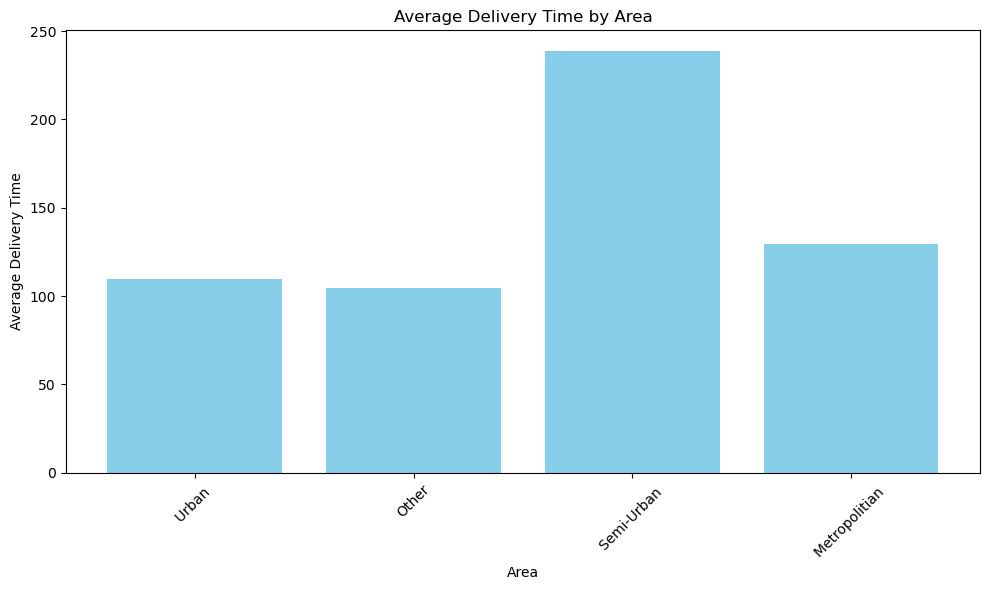

In [20]:
# Convert PySpark DataFrame to Pandas for plotting
area_delivery = df.groupBy("Area").agg(avg("Delivery_Time").alias("Avg_Delivery")).toPandas()

# Bar plot for delivery time by area
plt.figure(figsize=(10,6))
plt.bar(area_delivery["Area"], area_delivery["Avg_Delivery"], color='skyblue')
plt.xlabel("Area")
plt.ylabel("Average Delivery Time")
plt.title("Average Delivery Time by Area")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
